<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/HW5/DEelectoralHW5_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# a significance threshold of 5% will be assumed throughout

Use the delaware opendata to extract the voting precincts geometries

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 13.2MB/s 
     |████████████████████████████████| 14.8MB 303kB/s 


In [ ]:
!pip install -U --no-deps mapclassify git+git://github.com/geopandas/geopandas.git@master


  Cloning git://github.com/geopandas/geopandas.git (to revision master) to /tmp/pip-req-build-b1wswu4g
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-b1wswu4g
  Created wheel for geopandas: filename=geopandas-0.8.0+52.g7e595d0-py2.py3-none-any.whl size=969239 sha256=54dc742592e20b1d9f07d72f2e83fa01aa60c95cef574cfd0b61fed29e45dce1
  Stored in directory: /tmp/pip-ephem-wheel-cache-call1hi3/wheels/1e/57/dc/7a5ea8503aefb23576c42181adfca7fc173fde5b71900660bc
Successfully built geopandas
  Found existing installation: geopandas 0.8.1
    Uninstalling geopandas-0.8.1:
      Successfully uninstalled geopandas-0.8.1


In [ ]:
import geopandas as gpd
import pylab as plt

# read in data

## read in electoral precinct geojson file in geopandas (directly from the URL)

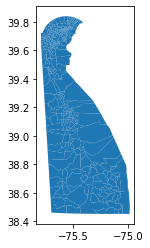

In [ ]:
de_elecp = gpd.read_file("https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson")
de_elecp.plot()

fig 0: leaving it here but if i was turning this as a homework i would remove it

In [ ]:
de_elecp.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746..."
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760..."
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686..."
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661..."
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658..."


In [ ]:
import numpy as np

## read in turnout data - keep only election district, and votes


In [ ]:
import pandas as pd
turnout = pd.read_csv("https://raw.githubusercontent.com/openelections/" + 
                      "openelections-data-de/master/2018/20181106__de__" + 
                      "general__precinct.csv")[["election_district", "votes"]]

In [ ]:
turnout

,election_district,votes
0,01-01,581
1,01-01,51
2,01-01,5
3,01-01,6
4,02-01,937
...,...,...
4719,07-41,545
4720,08-41,191
4721,08-41,335
4722,Total,3388


## group by election district and get the total number of data for that district

there are multiple entries for each geometry because there entries indicate the votes per candidate.


In [ ]:
turnout.groupby("election_district").sum()[["votes"]]

,votes
election_district,
01-01,2519
01-02,3632
01-03,2347
01-04,4676
01-05,3973
...,...
16-04,344
16-31,29
16-41,66


## merge the turnout data with the electoral map


In [ ]:
de_elecmap = de_elecp.merge(turnout.groupby("election_district").sum()[["votes"]], left_on="EDRD_2012",
                right_index=True, how="left")



In [ ]:
no0votesindx = de_elecmap.POPULATION > 0
de_elecmap = de_elecmap[no0votesindx]
de_elecmap.reset_index(inplace=True)

# make 3 maps: a coropleth of the population by electoral precinct, votes by precinct, and people density. 
Make sure you discuss patterns that appear, and that you consider the odd shape that delaware has in this map.... what is wrong with it? why does it not look like your usual maps of Delaware? how does this affect the descriptive analysis you just did? Make sure you choose appropriate colors maps and scheme to display the colors. Note that the last map may not be trivial to render. log10 function may be halpful (see notebook https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb but it is not required to use it) and also consider the individual values in the rows - are any of them unuaual? if there are consider dropping those values.

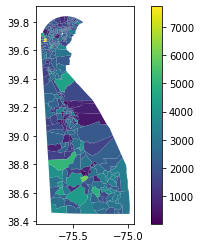

In [ ]:
#de_elecmap = de_elecmap[de_elecmap.POPULATION > 0]
de_elecmap.plot(column="POPULATION", legend=True);


**Figure 1**
Map of DE population per electoral precinct, data is sourced from the official Delaware opendata (geospatial data)

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

and USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv

The population per precinct is encoded in the color, ranging from ~100s to over 7000 individuals.


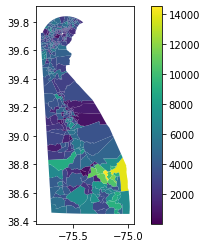

In [ ]:
de_elecmap.plot(column="votes", legend=True);

**Figure 2**
As Figure 1, but the total number of votes, for any race and any candidate are plotted. Assuming that people would on average vote in the same number of races if they vote at all, this the color gradient in this map can be compared with the color gradient in Figure 1: high particiopation (turnout) is visible in the Delaware shore.

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My\ Drive


/content/gdrive/My Drive


In [ ]:
gde = gpd.GeoDataFrame.from_file("tl_2018_10_tract.shp")
gde = gde[gde.ALAND>0]
gde.plot(color="None", edgecolor='k')


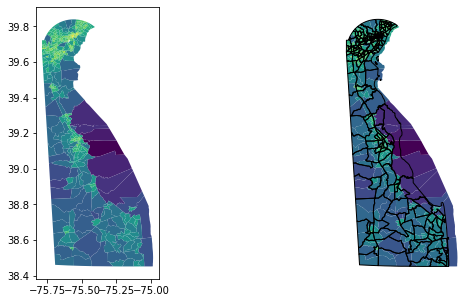

In [ ]:
import numpy as np
import matplotlib
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
de_elecmap_ft = de_elecmap.to_crs(epsg="2263")
de_elecmap["popdensity"] = (de_elecmap.POPULATION / de_elecmap_ft.geometry.area * 5280 * 5280)
ax = de_elecmap.plot(column="popdensity", norm=matplotlib.colors.LogNorm(), ax=ax)

ax = fig.add_subplot(122)
ax = de_elecmap.plot(column="popdensity", norm=matplotlib.colors.LogNorm(), ax=ax)
gde.plot(color="None", edgecolor='k', facecolor=None, ax=ax)
ax.axis('off');

**Figure 3**
Population density map for the precinct geometries in Figure 1 and 2. The low population density in the shore is explained by the shape of the precinct whose boundaries include water. When compared with a map of Delaware census tracts cliped at the shore the escess land included in the precincts geography is obvious. Aside from that, the most obvious trait is the high density in the rural Wilmington-Newark area, and Dover area. The color is mapped to the logarithm of the population density for easier visibility

# look at the variables' correlation

In [ ]:
import scipy as sp

In [ ]:
de_elecmap.corr()

,index,OBJECTID,ID,POPULATION,votes,popdensity
index,1.000000,1.000000,0.991604,0.040705,0.181171,-0.353621
OBJECTID,1.000000,1.000000,0.991604,0.040705,0.181171,-0.353621
ID,0.991604,0.991604,1.000000,0.038756,0.180722,-0.353507
POPULATION,0.040705,0.040705,0.038756,1.000000,0.621288,-0.036099
votes,0.181171,0.181171,0.180722,0.621288,1.000000,-0.226415
popdensity,-0.353621,-0.353621,-0.353507,-0.036099,-0.226415,1.000000


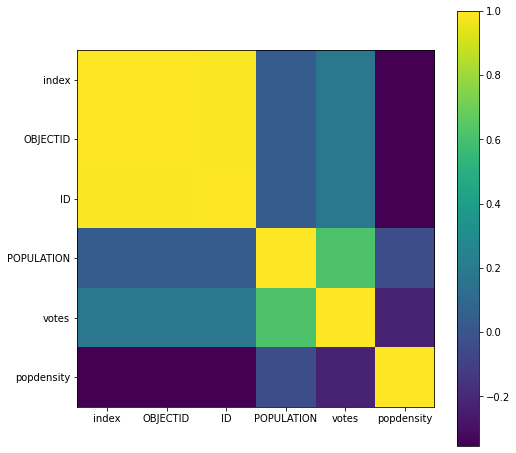

In [32]:
import pylab as plt
#Correlation matrix - we will discuss this kind of plot soon
plt.figure(figsize=(8,8))
plt.imshow(de_elecmap.corr())
plt.xticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.yticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.colorbar();

**Figure 4**
Correlation (Pearson's _r_ coefficient of the features in the Delaware election dataset under consideration: Aside from the trivial high correlation of each variable with itsef, population shows a positive liner correlation with votes (_r_~0.6) while population density shows no obvious correlation. 

# fit a line model to the data and a polynomial of second degree. 
You can use whatever package you want but if you use statsmodels you can get 
model diagnostics that will help you discuss the model

https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb


# extra credit: set up the problem as a machine leraning problem by splitting the sample into training and test data and evaluating the model on both sets.

This is in the notebook I shared, even if we did not get to talk about it in class https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

In [34]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(de_elecmap.POPULATION.values, 
                                                    de_elecmap.votes.values, test_size=0.25, 
                                                     random_state=302)
X_train

# or I can do
np.random.seed(302)
inds = np.sort(np.random.choice(de_elecmap.index, 
                                int(de_elecmap.shape[0] * 0.75), replace=False))

In [37]:
de_elecmap_train = de_elecmap[["votes", "POPULATION", "popdensity"]].loc[inds].dropna()
de_elecmap_test = de_elecmap[["votes", "POPULATION", "popdensity"]].loc[
  np.array([i for i in de_elecmap.index if not i in inds ])].dropna()

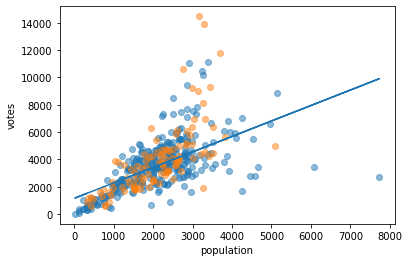

In [38]:
# these syntaxes are equivalent
# model1 = sm.OLS(y_train, X_train).fit()
model1 = smf.ols(formula = "votes ~ POPULATION", data=de_elecmap_train).fit()
ypred = model1.predict() 
plt.scatter(de_elecmap_train.POPULATION, de_elecmap_train.votes, alpha=0.5)
plt.scatter(de_elecmap_test.POPULATION, de_elecmap_test.votes, alpha=0.5);
plt.xlabel("population")
plt.ylabel("votes")
plt.plot(de_elecmap_train.POPULATION, ypred);

**Figure 6**
Scatter plot of votes agains population, with the best line fit plotted (as obtained by Ordinary Least Square fit with no weights to the training set, plotted as blue dots, which comprises 75% of the data). The test data is plotted in orange.

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     194.3
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           8.08e-35
Time:                        17:04:32   Log-Likelihood:                -2799.1
No. Observations:                 321   AIC:                             5602.
Df Residuals:                     319   BIC:                             5610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1149.2646    189.152      6.076      0.000     777.121    1521.408
POPULATION     1.1330      0.081     13.939      0.000       0.973       1.293
==============================================================================
Omnibus:                       58.255   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.468
Skew:                           0.606   Prob(JB):                     4.66e-67
Kurtosis:                       7.623   Cond. No.                     5.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comments** 
The model fit parameters for the line fit: The model conveys 40% of the variance in the data (R2~0.4, Adjusted R2~0.4) which indicates a relative poor fit. By inspecting Figure 5 the scatter that is visible both above and below the morel at large population numbers is consistent with the poor result of the fit. However, both the intercept and the coefficient of the population feature are significant (p<0.05). The model residuals, however, are not normal (JB test p<0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     154.8
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           1.15e-47
Time:                        03:02:09   Log-Likelihood:                -2766.4
No. Observations:                 321   AIC:                             5539.
Df Residuals:                     318   BIC:                             5550.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -315.8743    243.063     -1.300      0.195    -794.088     162.339
I(POPULATION ** 2)    -0.0003   3.44e-05     -8.485      0.000      -0.000      -0.000
POPULATION             2.5891      0.187     13.869      0.000       2.222       2.956
==============================================================================
Omnibus:                       87.408   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.457
Skew:                           1.166   Prob(JB):                     1.55e-65
Kurtosis:                       7.108   Cond. No.                     2.51e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

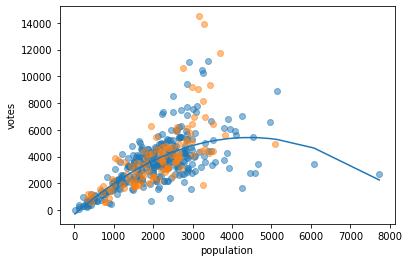

In [44]:
model2 = smf.ols(formula = "votes ~ I(POPULATION**2) + POPULATION", data=de_elecmap_train).fit()
ypred = model2.predict(de_elecmap_train.sort_values("POPULATION")) 
plt.scatter(de_elecmap_train.POPULATION, de_elecmap_train.votes, alpha=0.5)
plt.scatter(de_elecmap_test.POPULATION, de_elecmap_test.votes, alpha=0.5);
plt.xlabel("population")
plt.ylabel("votes")
plt.plot(de_elecmap_train.sort_values("POPULATION").POPULATION, ypred);
model2.summary()

**Figure 7**
A second degree poplynomial fit on the populatoin feature. The data and the model are plotted as in Figure 6. The model drops at large population numbers, but it should be noted that there is a single point at very high population value. This should prompt an influence analysis (see below).

**Comment** The model diagnostics for the second degree polynomial indicate a significant coefficient for the population squared (p<0.05) and an improvement of both R2 and Adjusted R2 to 50% explained variance

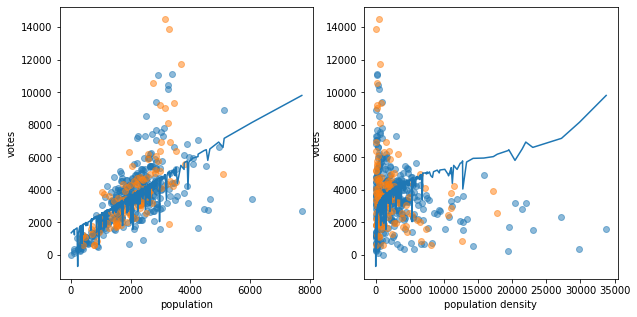

In [143]:
model3 = smf.ols(formula = "votes ~ popdensity + POPULATION", data=de_elecmap_train).fit()
ypred = model3.predict(de_elecmap.sort_values("POPULATION")) 
fig = plt.figure(figsize=(10,5))

fig.add_subplot(121)
plt.scatter(de_elecmap_train.POPULATION, de_elecmap_train.votes, alpha=0.5)
plt.scatter(de_elecmap_test.POPULATION, de_elecmap_test.votes, alpha=0.5);
plt.xlabel("population")
plt.ylabel("votes")
plt.plot(de_elecmap.sort_values("POPULATION").POPULATION, ypred);

fig.add_subplot(122)
plt.plot(de_elecmap.sort_values("popdensity").popdensity, ypred);
plt.scatter(de_elecmap_train.popdensity, de_elecmap_train.votes, alpha=0.5)
plt.scatter(de_elecmap_test.popdensity, de_elecmap_test.votes, alpha=0.5);
plt.xlabel("population density")
plt.ylabel("votes");


**Figure 8** 
A bivariate linear regression on population and population density model is shown. A visualization of a bivariate linear model is not trivial. Here each exogenous variable is shown separately and the model predictions are shown at the respective value of the exogenous variable. A better visualization is included below. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           5.04e-38
Time:                        04:22:06   Log-Likelihood:                -2788.8
No. Observations:                 321   AIC:                             5584.
Df Residuals:                     318   BIC:                             5595.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1434.2368    193.617      7.408      0.000    1053.306    1815.168
popdensity    -0.0803      0.017     -4.601      0.000      -0.115      -0.046
POPULATION     1.1187      0.079     14.181      0.000       0.964       1.274
==============================================================================
Omnibus:                       53.920   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.848
Skew:                           0.503   Prob(JB):                     1.92e-68
Kurtosis:                       7.723   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

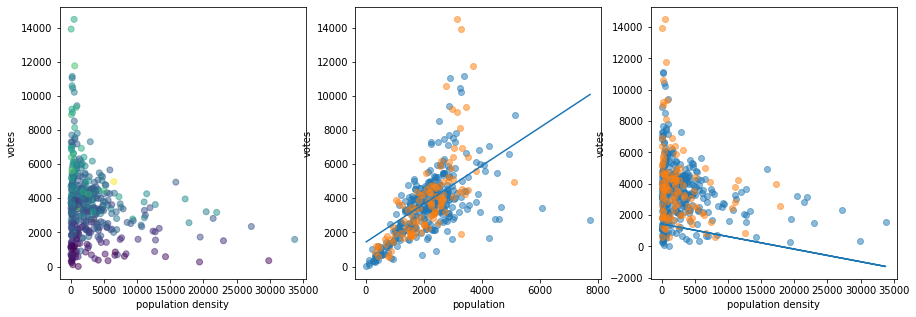

In [144]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(131)
plt.scatter(de_elecmap_train.popdensity, de_elecmap_train.votes, alpha=0.5, 
            c=de_elecmap_train.POPULATION / de_elecmap_train.POPULATION.max())
plt.scatter(de_elecmap_test.popdensity, de_elecmap_test.votes, alpha=0.5,
            c=de_elecmap_test.POPULATION / de_elecmap_test.POPULATION.max());
plt.xlabel("population density")
plt.ylabel("votes")


fig.add_subplot(132)
plt.scatter(de_elecmap_train.POPULATION, de_elecmap_train.votes, alpha=0.5)
plt.scatter(de_elecmap_test.POPULATION, de_elecmap_test.votes, alpha=0.5);
plt.xlabel("population")
plt.ylabel("votes")
plt.plot(de_elecmap.sort_values("POPULATION").POPULATION,
         model3.params[0] + de_elecmap.sort_values("POPULATION").POPULATION * model3.params[2]);

fig.add_subplot(133)
plt.plot(de_elecmap.sort_values("POPULATION").popdensity,
         model3.params[0] + de_elecmap.sort_values("POPULATION").popdensity * model3.params[1]);
plt.scatter(de_elecmap_train.popdensity, de_elecmap_train.votes, alpha=0.5)
plt.scatter(de_elecmap_test.popdensity, de_elecmap_test.votes, alpha=0.5);
plt.xlabel("population density")
plt.ylabel("votes")


model3.summary()

**Figure 9** 
**Left**: the votes vs population density colorcoded by population 
**Center and Right** Same model as in Figure 8 showning the univariate components independently. The dependence on population is positive (and within the interquartile range of the dependency on population found in the univariate model [0.973	1.293]). The dependence on the population density is inverse. 


**Comments** there is no obvious improvement compared to the univariate regression (first shown model) with R2 and Adjusted R2 both ~0.4% (to the first decimal digit). However, like in the second degree polynomial case, both variables are significant.


# Make an influence plot for each of the 2 models following the notebook in class. 
https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

Interpret it based on the slides and the notebook info
---



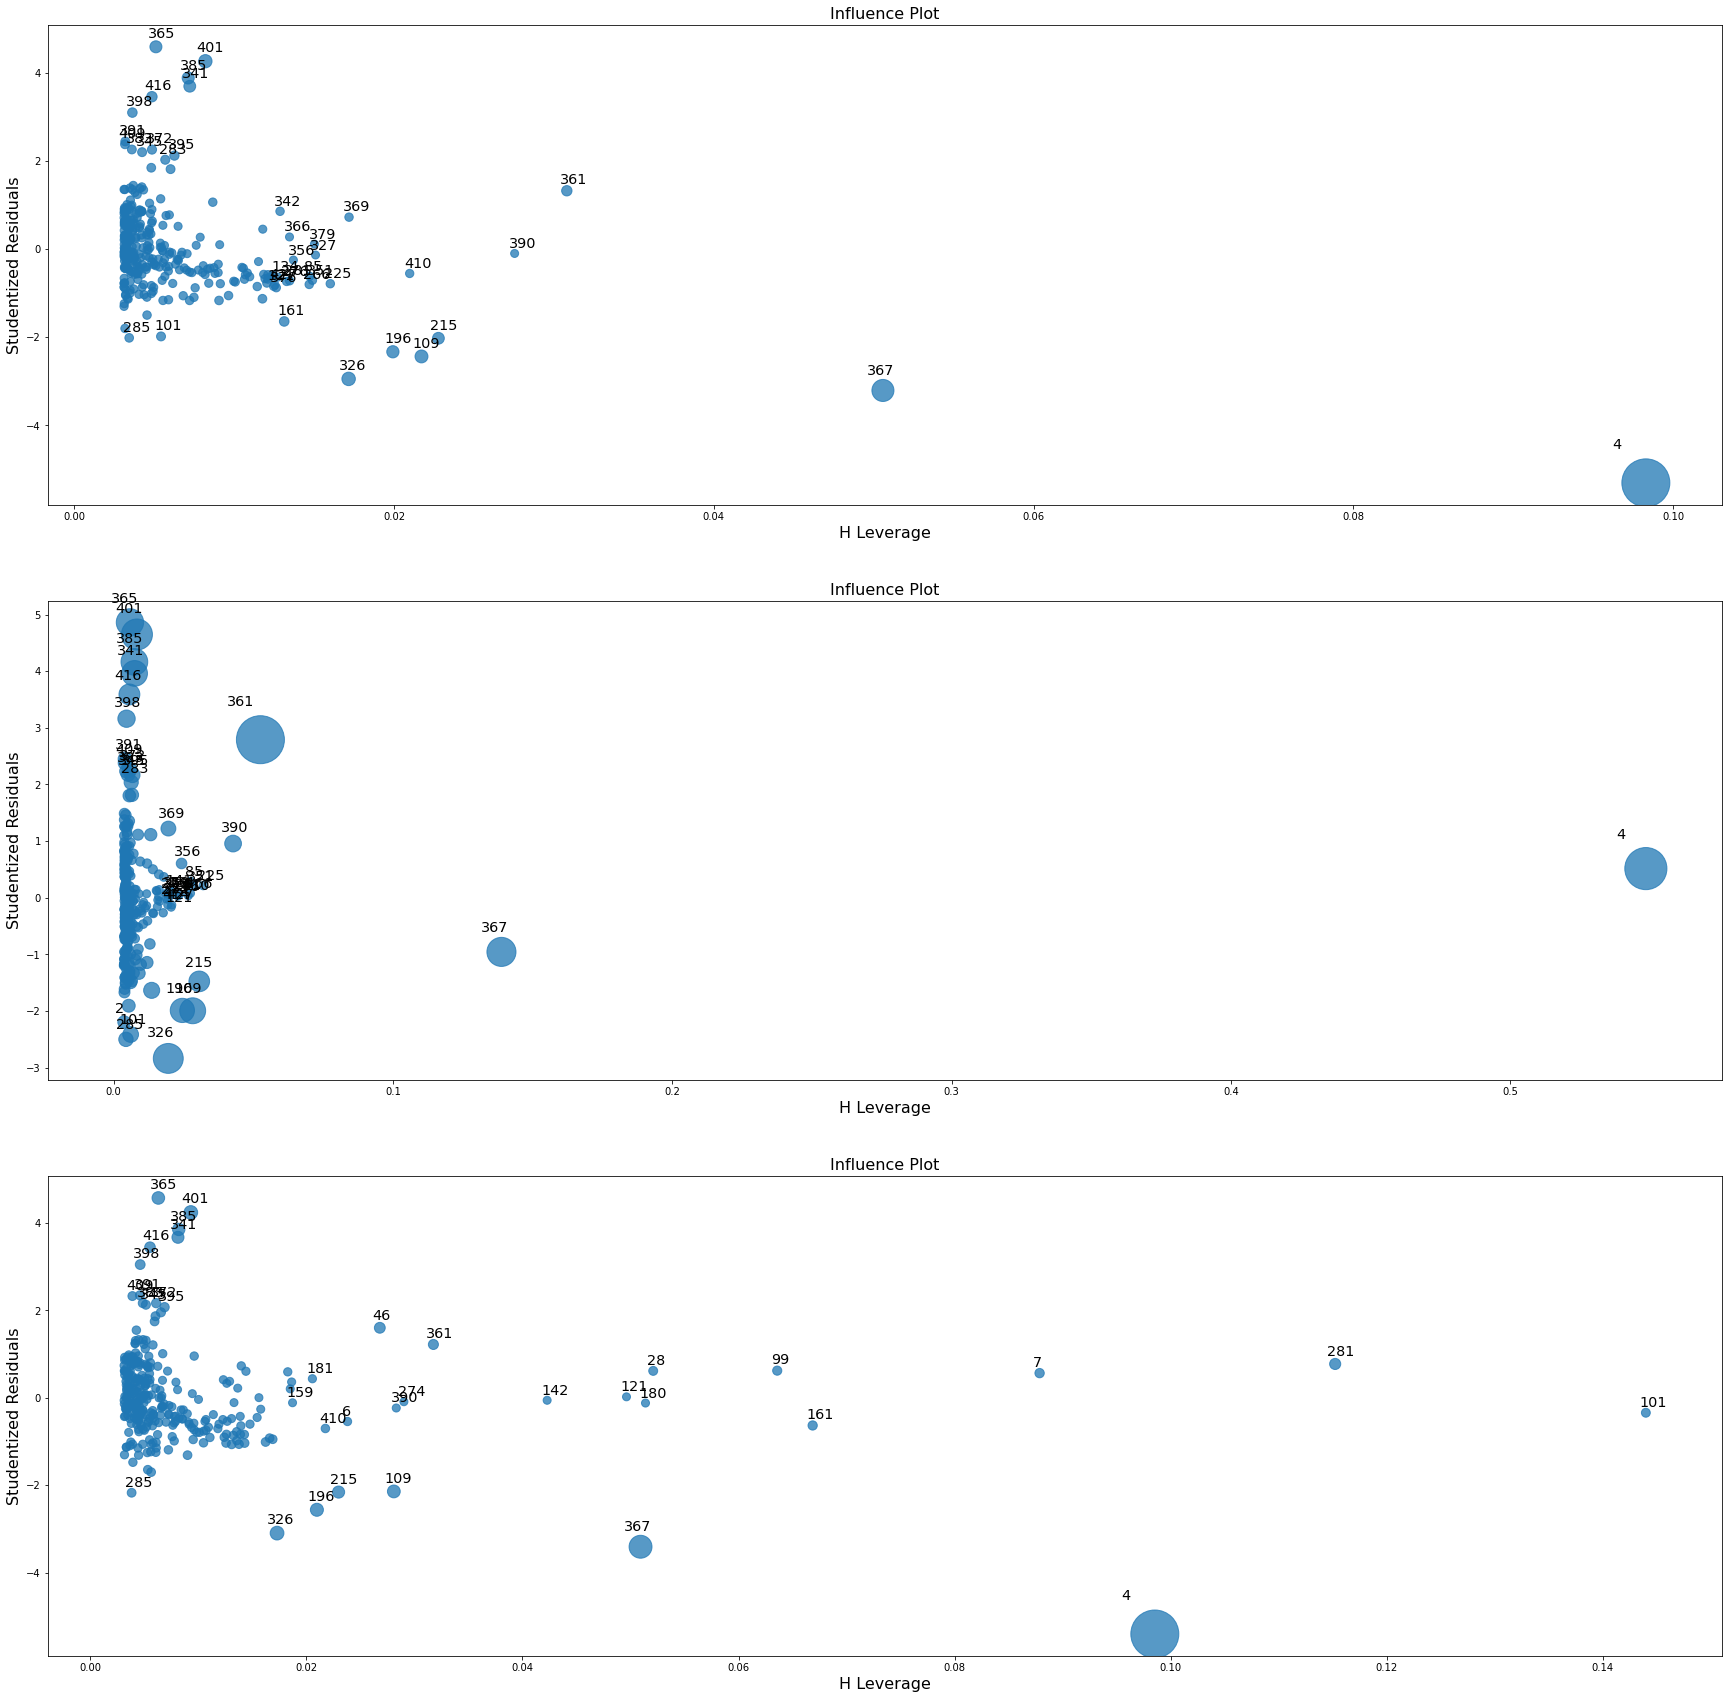

In [145]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(311)
sm.graphics.influence_plot(model1, ax=ax);
ax = fig.add_subplot(312)

sm.graphics.influence_plot(model2, ax=ax);
ax = fig.add_subplot(313) 
sm.graphics.influence_plot(model3, ax=ax);




In [146]:
de_elecmap_train.loc[4]

votes           2722.000000
POPULATION      7734.000000
popdensity      3461.239454
voterdensity       0.351952
Name: 4, dtype: float64

In [147]:
de_elecmap_train.loc[361]

votes           8900.000000
POPULATION      5135.000000
popdensity        94.889898
voterdensity       1.733204
Name: 361, dtype: float64

**Figure 9**
Influence plot for the data and each of the three models discussed above. The plot shows the standardized resicuals (y) against the H leverage (x) and the size of the points represents the Cooks distance: the normalized change in the fitted response values occurring if the point is deleted.Both univariate linear models show datapoint 4 at high leverage and with high residuals, and corresponding large Cook's distance: a point of great influence in the models. Point 4 is shown above and plotted in Figure 10: Newark, with a very high resident population but a low turnout. The same precinct has smaller leverage in the population+population density bivariate model, but is still the most influential datapoint in the model. The second degree polynomial also shows precinct 361, also plotted in Figure 10. 

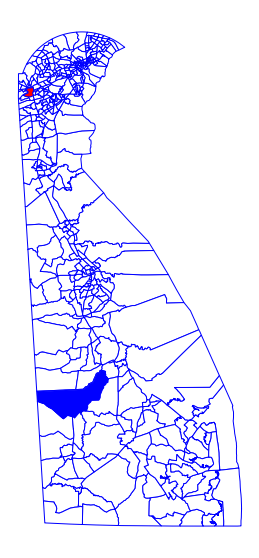

In [148]:
ax = de_elecmap.plot(facecolor="w", edgecolor='b', figsize=(10,10));
de_elecmap.loc[4:4].plot(facecolor="r", edgecolor='b', ax=ax);
de_elecmap.loc[361:361].plot(facecolor="b", edgecolor='b', ax=ax);
ax.axis('off');

**Figure 10** the precincts that are most influential on the model. Newark, with a very high resident population but a low turnout - this may be due to students population under voting age or not registered to vote in Delaware. Another precinct precinct has a relatively high turnout in the south west of the state.

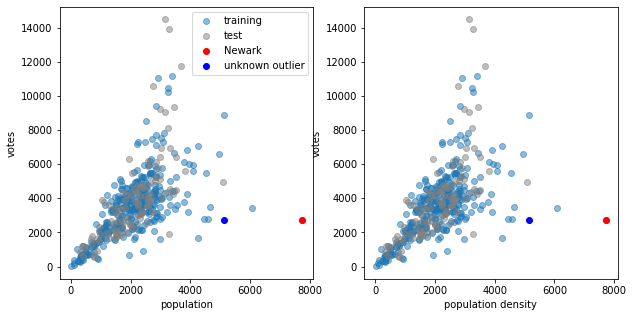

In [149]:
fig = plt.figure(figsize=(10,5))

fig.add_subplot(121)
plt.scatter(de_elecmap_train.POPULATION, de_elecmap_train.votes, alpha=0.5, label="training")
plt.scatter(de_elecmap_test.POPULATION, de_elecmap_test.votes, alpha=0.5, c='gray', label="test");
plt.scatter(de_elecmap_train.loc[4:4].POPULATION, de_elecmap_train.loc[4:4].votes, 
            alpha=1, c='r', label="Newark");
plt.scatter(de_elecmap_train.loc[361:361].POPULATION, de_elecmap_train.loc[4:4].votes, 
            alpha=1, c='b', label="unknown outlier");
plt.xlabel("population")
plt.ylabel("votes")
plt.legend()

fig.add_subplot(122)
plt.scatter(de_elecmap_train.POPULATION, de_elecmap_train.votes, alpha=0.5, label="training")
plt.scatter(de_elecmap_test.POPULATION, de_elecmap_test.votes, alpha=0.5, c='gray', label="test");
plt.scatter(de_elecmap_train.loc[4:4].POPULATION, de_elecmap_train.loc[4:4].votes, 
            alpha=1, c='r', label="Newark");
plt.scatter(de_elecmap_train.loc[361:361].POPULATION, de_elecmap_train.loc[4:4].votes, 
            alpha=1, c='b', label="unknown outlier");
plt.xlabel("population density")
plt.ylabel("votes");


**Figure 11**
The data plotted as in Figure 9, with the highest influence point plotted in red and blue respectively. See discussion in the captions of Figure 9 and 10.

# Compare the models with the Likelihood Ratio test (follow example in class)


In [151]:
print('likelihood ration test - set alpha to alpha=0.05\n\n' ,  
      'the NH is that the more complex model is better than the simpler one\n\n' ,
'''the likelihood ration statistics is {0:.2f}, which corresponds to a p-value of {1:.2f}\n
since the likelishood ratio statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (={2:.0f} here)
this corresponds to the rejection of the NH'''.format(*model2.compare_lr_test(model1)))

likelihood ration test - set alpha to alpha=0.05

 the NH is that the more complex model is better than the simpler one

 the likelihood ration statistics is 65.51, which corresponds to a p-value of 0.00

since the likelishood ratio statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (=1 here)
this corresponds to the rejection of the NH


In [154]:
from sklearn.metrics import r2_score 
# set alpha to 0.05
def printresult(r2, r, alpha=0.1):
  print("conveying {:d}% of the variance in the data and is".format(int(100 *r2)))
  if r < alpha:
    print("better than the first degree polynomial model (p-value {:.2g})".format(r))
  else: 
    print("too complex compared to the first degree polynomial model")

print("\nthe univariate line fit model is conveying {:d}% of the variance in the data".format(
    int(100 * r2_score(de_elecmap_test.dropna().votes, model1.predict(de_elecmap_test.dropna())))))
print("\nthe quadratic model is")
printresult(r2_score(de_elecmap_test.dropna().votes, model2.predict(de_elecmap_test.dropna())),
            model2.compare_lr_test(model1)[1])
print("\nthe multivariate model is")

printresult(r2_score(de_elecmap_test.dropna().votes, model3.predict(de_elecmap_test.dropna())),
            model3.compare_lr_test(model1)[1])



the univariate line fit model is conveying 35% of the variance in the data

the quadratic model is
conveying 39% of the variance in the data and is
better than the first degree polynomial model (p-value 5.8e-16)

the multivariate model is
conveying 40% of the variance in the data and is
better than the first degree polynomial model (p-value 5.4e-06)


**Comments** 
Both the quadratic model and the multivariate linear model are better than the original linear regression.
But we have not assessed if the model is overfitting the data by examining the cross validation.

%NOTE: alteratively, assume that the multivariate model fails the significance test here: "The second degree polynomial emerges as the best of the three models. ."

In [155]:
from sklearn import metrics
accs = metrics.mean_squared_error(de_elecmap_train.votes, model2.predict(de_elecmap_train)),\
      metrics.mean_squared_error(de_elecmap_test.votes, model2.predict(de_elecmap_test))
       
#1 - np.abs(np.average((de_elecmap_train.votes - model2.predict(de_elecmap_train)) / de_elecmap_train.votes)),\
#1 - np.abs(np.average((de_elecmap_test.votes - model2.predict(de_elecmap_test)) / de_elecmap_test.votes))

print("QUADRATIC MODEL")
print("the accuracy in the prediction is {:.2} on the train and {:.2} on the test score.".format(*accs))


if accs[1] >= accs[0] * 1.1 :
  print("the performance on the test set is significantly worse, indicating overfit")
else:
  print("there is no loss of accuracy transitionining from the train to the test set indicating no overfit")


print("BIVARIATE MODEL")
accs = metrics.mean_squared_error(de_elecmap_train.votes, model3.predict(de_elecmap_train)),\
      metrics.mean_squared_error(de_elecmap_test.votes, model3.predict(de_elecmap_test))

print("the accuracy in the prediction is {:.2} on the train and {:.2} on the test score.".format(*accs))


if accs[1] >= accs[0] * 1.1 :
  print("the performance on the test set is significantly worse, indicating overfit")
else:
  print("there is no loss of accuracy transitionining from the train to the test set indicating no overfit")

QUADRATIC MODEL
the accuracy in the prediction is 1.8e+06 on the train and 3.8e+06 on the test score.
the performance on the test set is significantly worse, indicating overfit
BIVARIATE MODEL
the accuracy in the prediction is 2.1e+06 on the train and 3.8e+06 on the test score.
the performance on the test set is significantly worse, indicating overfit



# Discuss your model: what it means mathematically and what it means in practice

You must discuss the model on the basis of the model summary (R squared, adjusted R squared, p-values for the coefficients etc)

You must discuss the influence plot on the basis of the lecture discussion and of the reading

You must assess wheather the more complex model is better

**DATA**

A proxy for the voter turnout was obtained from a dataset of electoral results from the 2018 election. 
All races and all votes were included in counting the votes. 

The geography of each electoral district is obtained from  electoral map data available from the Delaware opendata portal. The GIS data is, however, from the 2012 electoral district. I did not check if any changes occurred between 2012 and 2016. 

The population for each electoral district is obtained from the electoral district maps dataset and it is not explained in the dataset source what this quantity actually means: it is not clear if this is the voting age population, the population registered to vote, or the overall population from census data. 

**MODELS**
Three simple linear models are fit to the data: a univariate regression on population, a second degree polynomial regression on population, and a bivariate linear regression on population and population density. 

Model conveys between 40 and 50% of the variance. 

The variables included, population and population density, both prove to be significant at a p-value < 0.05. 

However, the residuals of the models are not normal indicating some systematic effect is not captured by any of the models. 

An influence points analysis shows that the Newark electoral districts is influencial, with low voter turnout, which we speculate may be due to the students' population that may be not registered to vote due to the age or because they may be registered in their home state. Without more information about how the population per electoral district is counted we cannot say more. Another precincts shows up as significant in the second degree polynomial but it is not obvious what this district includes. 

A Likelihood Ratio test shows that both univariate quadratic model ```votes ~ population + population**2``` with positive dependence on polulation and negative dependence on population squared
and bivariate model with population density dependency ```votes ~ population + population-dansity``` with positive dependence on polulation and negative dependence on population density, are supported by the data. 

But the high influence points drive the direction of the population-squared term. I would discount the overall significance of the population squared parameter in spite of its statistical significance. This is consistent with the overfit measured by cross correlation: the mean square error increases by a factor 3 when applied to the test set. Redoing the analysis without Newark may provide more evidence. 

The dependency on population density in the bivariate model is inverse: higher population density leads to lower voter turnout. This can be interpreted as a difference between rural and urban districts (low and high population density). However, visual inspection of the population density dependence (Figure 9 left) shows that the population density distribution is highly skewed and the -10% dependency on the population density seems excessive (Figure 9 right).

**CONCLUSIONS**
We are left with an underwhelming result: the number of votes is proportional to the number of people in the voting district and weakly proporitonal to the inverse of the density, which suggests lower turnout in urban districts. However, the uncertainty in the demographic in the population variable, the potential mismatch between the 2012 districts and the 2016 turnout data decrease confidence in these results.

